In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import VarianceThreshold


In [2]:
import pandas as pd

# Correct the file path according to your dataset's location and name
file_path = 'C:\\Users\\USER\\Downloads\\MS4S16_Dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\USER\\Downloads\\MS4S16_Dataset.csv'

In [3]:
import pandas as pd

# Update the file path to match your dataset's location and name
file_path = 'C:\\Users\\USER\\Downloads\\MS4S16_Dataset 2.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to confirm it's loaded correctly
data.head()



,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302.0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517.0,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903.0,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301.0,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402.0,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Check for missing values
print(data.isnull().sum())
# Handle missing values (if any)

# Check for duplicates
print(data.duplicated().sum())
# Remove duplicates (if any)
data.drop_duplicates(inplace=True)


id                          3
diagnosis                   3
radius_mean                 5
texture_mean                6
perimeter_mean              4
area_mean                   5
smoothness_mean             3
compactness_mean            4
concavity_mean              4
concave points_mean         8
symmetry_mean               3
fractal_dimension_mean      4
radius_se                   6
texture_se                  8
perimeter_se                3
area_se                     6
smoothness_se               6
compactness_se              7
concavity_se                8
concave points_se           9
symmetry_se                 8
fractal_dimension_se        7
radius_worst               13
texture_worst              21
perimeter_worst             6
area_worst                  4
smoothness_worst            9
compactness_worst           4
concavity_worst             3
concave points_worst        6
symmetry_worst              4
fractal_dimension_worst    13
dtype: int64
4


In [5]:
# Encoding categorical target variable
le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])

# Splitting the dataset
X = data.drop(['id', 'diagnosis'], axis=1)
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
# Example: Removing low variance features
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_train_selected = sel.fit_transform(X_train_scaled)
X_test_selected = sel.transform(X_test_scaled)


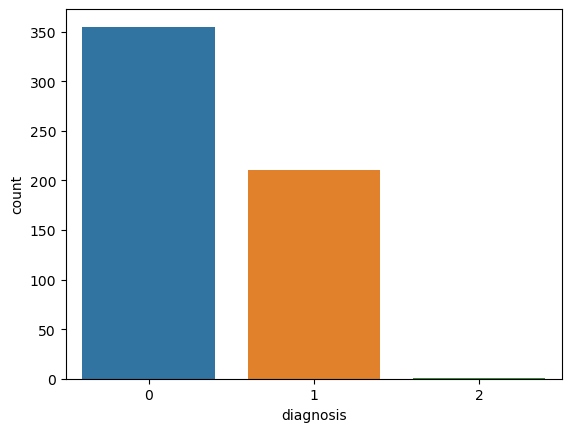

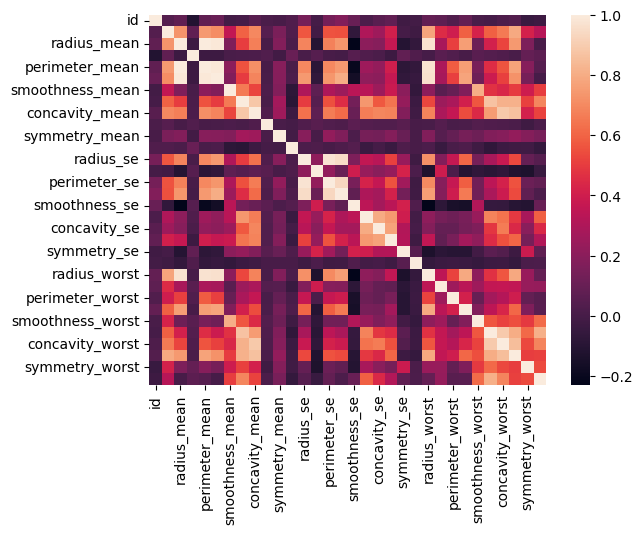

In [9]:
# Visualizing data distribution
sns.countplot(x='diagnosis', data=data)
plt.show()

# Correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix)
plt.show()


In [10]:
# Example: Analyzing mean feature differences between classes
data.groupby('diagnosis').mean()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,2.619497e+07,12.143828,-267.270028,78.080311,463.128249,0.092509,0.080114,0.046055,-5.602668,0.173715,...,13.388736,23.584839,92.776903,585.671469,0.125087,0.183018,0.166563,0.074617,0.270395,0.079527
1,3.698835e+07,17.443158,-197.115905,115.300284,978.866667,0.102899,0.145137,0.160566,0.088163,0.210450,...,21.134734,29.254928,141.353602,1422.311374,0.144981,0.375194,0.451102,0.182357,0.323617,0.091697
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have already scaled your data and it's stored in X_scaled
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the results of the Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fit K-means with the optimal number of clusters
optimal_clusters = 3  # Replace with the number you find optimal
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Visualizing the clusters (if you have 2 or 3 features for easy visualization)
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='red', label ='Cluster 1')
# Repeat for other clusters
plt.title('Clusters of data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


NameError: name 'X_scaled' is not defined

In [12]:
import scipy.cluster.hierarchy as sch

# Creating a dendrogram to find the optimal number of clusters
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Euclidean distances')
plt.show()

# Fitting Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=optimal_clusters, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X_scaled)


NameError: name 'X_scaled' is not defined

In [13]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X_scaled)


NameError: name 'X_scaled' is not defined

In [14]:
# Assuming 'data' is your DataFrame
X = data.drop(['id', 'diagnosis'], axis=1)  # Drop non-feature columns


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have already scaled your data and it's stored in X_scaled
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the results of the Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fit K-means with the optimal number of clusters
optimal_clusters = 3  # Replace with the number you find optimal
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Visualizing the clusters (if you have 2 or 3 features for easy visualization)
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='red', label ='Cluster 1')
# Repeat for other clusters
plt.title('Clusters of data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [17]:
# Drop rows with NaN values
X_dropped = X.dropna()

# Then scale your data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dropped)


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

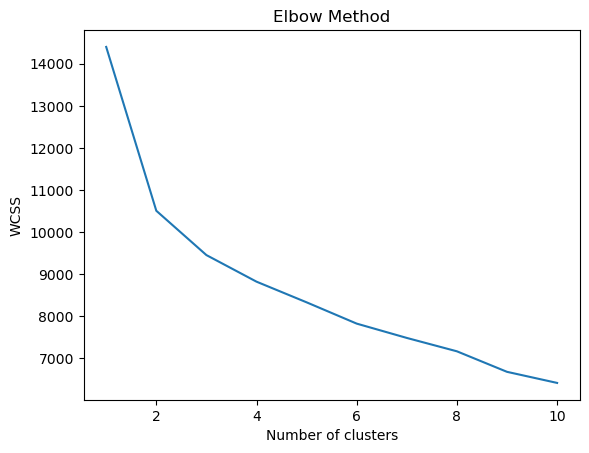

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


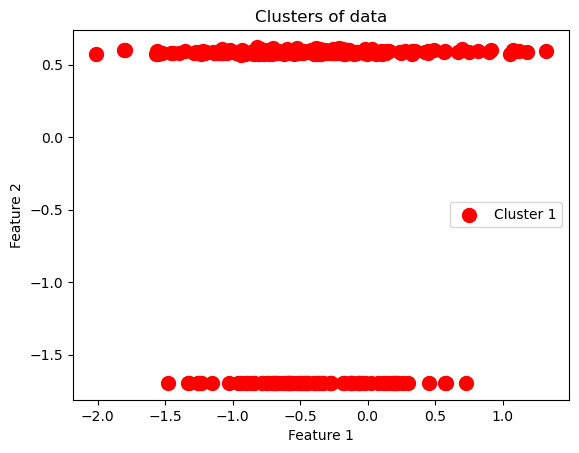

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have already scaled your data and it's stored in X_scaled
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the results of the Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fit K-means with the optimal number of clusters
optimal_clusters = 3  # Replace with the number you find optimal
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Visualizing the clusters (if you have 2 or 3 features for easy visualization)
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='red', label ='Cluster 1')
# Repeat for other clusters
plt.title('Clusters of data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Adjust the number of components
X_pca = pca.fit_transform(X_scaled)

# Now we apply clustering techniques on X_pca


In [20]:
from sklearn.metrics import silhouette_score

# For K-means
silhouette_score(X_scaled, y_kmeans)

# Similarly, we  compute for other clustering methods


0.2706654972179647

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame and 'diagnosis' is the target column
X = data.drop(['diagnosis'], axis=1)
y = data['diagnosis']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [25]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(strategy='mean')

# Create a pipeline that first imputes the data then fits the model
model = make_pipeline(imputer, LogisticRegression())

# Apply the pipeline to your data
model.fit(X_train, y_train)

# Predictions and evaluations can be done using the pipeline
y_pred = model.predict(X_test)


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame and 'diagnosis' is the target column
X = data.drop(['diagnosis'], axis=1)
y = data['diagnosis']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [28]:
# Drop rows with NaN values
X_train_dropped = X_train.dropna()
y_train_dropped = y_train[X_train_dropped.index]

X_test_dropped = X_test.dropna()
y_test_dropped = y_test[X_test_dropped.index]

# Fit the model
model = LogisticRegression()
model.fit(X_train_dropped, y_train_dropped)

# Predictions and evaluations
y_pred = model.predict(X_test_dropped)


IndexError: index 495 is out of bounds for axis 0 with size 453

In [29]:
# Drop rows with NaN values from X_train
X_train_dropped = X_train.dropna()

# Reset the index of X_train_dropped
X_train_dropped.reset_index(drop=True, inplace=True)

# Drop the corresponding rows in y_train
y_train_dropped = y_train.drop(X_train.index[~X_train.index.isin(X_train_dropped.index)])

# Reset the index of y_train_dropped
y_train_dropped.reset_index(drop=True, inplace=True)

# Similarly, for the test set
X_test_dropped = X_test.dropna()
X_test_dropped.reset_index(drop=True, inplace=True)

y_test_dropped = y_test.drop(X_test.index[~X_test.index.isin(X_test_dropped.index)])
y_test_dropped.reset_index(drop=True, inplace=True)

# Now you can fit your model
model = LogisticRegression()
model.fit(X_train_dropped, y_train_dropped)

# Predictions and evaluations
y_pred = model.predict(X_test_dropped)


AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [30]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression()

# Fit the model with the training data
model.fit(X_train_dropped, y_train_dropped)


NameError: name 'y_train_dropped' is not defined

In [31]:
# Drop rows with NaN values from X
X_train_dropped = X_train.dropna()
X_test_dropped = X_test.dropna()

# Drop the corresponding rows from y
y_train_dropped = y_train.loc[X_train_dropped.index]
y_test_dropped = y_test.loc[X_test_dropped.index]


AttributeError: 'numpy.ndarray' object has no attribute 'loc'

In [32]:
# Find the indices of rows with NaN values in X_train and X_test
nan_indices_train = X_train.index[X_train.isna().any(axis=1)]
nan_indices_test = X_test.index[X_test.isna().any(axis=1)]

# Drop rows with NaN values from X_train and X_test
X_train_dropped


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
117,864729.0,14.870,16.67,98.64,682.5,0.11620,0.16490,0.16900,0.08923,0.2157,...,18.810,27.37,127.10,1095.0,0.1878,0.44800,0.4704,0.20270,0.3585,0.10650
0,842302.0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.1622,0.66560,0.7119,0.26540,0.4601,0.11890
330,896839.0,16.030,15.51,105.80,793.2,0.09491,0.13710,0.12040,0.07041,0.1782,...,18.760,21.98,124.30,1070.0,0.1435,0.44780,0.4956,0.19810,0.3019,0.09124
293,891703.0,11.850,17.46,75.54,432.7,0.08372,0.05642,0.02688,0.02280,0.1875,...,13.060,25.75,84.35,517.8,0.1369,0.17580,0.1316,0.09140,0.3101,0.07007
426,907409.0,10.480,-999.00,67.49,333.6,0.09816,0.10130,0.06335,0.02218,0.1925,...,12.130,21.57,81.41,440.4,0.1327,0.29960,0.2939,0.09310,0.3020,0.09646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,859711.0,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,...,9.733,15.67,62.56,284.4,0.1207,0.24360,0.1434,0.04786,0.2254,0.10840
106,863031.0,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,...,13.140,29.26,85.51,521.7,0.1688,0.26600,0.2873,0.12180,0.2806,0.09097
272,8910988.0,21.750,20.99,147.30,1491.0,0.09401,0.19610,0.21950,0.10880,0.1721,...,28.190,28.18,195.90,2384.0,0.1272,0.47250,0.5807,0.18410,0.2833,0.08858
437,909220.0,14.040,15.98,89.78,611.2,0.08458,0.05895,0.03534,0.02944,0.1714,...,15.660,21.58,101.20,750.0,0.1195,0.12520,0.1117,0.07453,0.2725,0.07234


In [33]:

2. **Use Boolean Indexing to Drop Corresponding Rows from `y_train` and `y_test`**:

Since `y_train` and `y_test` are NumPy arrays, you can use boolean arrays to select the rows that correspond to the non-NaN rows in `X_train_dropped` and `X_test_dropped`.

```python
# Create boolean arrays for indices to keep
keep_train = ~X_train.index.isin(nan_indices_train)
keep_test = ~X_test.index.isin(nan_indices_test)

# Select the corresponding rows from y_train and y_test
y_train_dropped = y_train[keep_train]
y_test_dropped = y_test[keep_test]


SyntaxError: invalid syntax (1051926899.py, line 1)

In [34]:
# Drop rows with NaN values from X_train and X_test
X_train_dropped = X_train.dropna()
X_test_dropped = X_test.dropna()


In [35]:
# Select the corresponding rows from y_train and y_test
y_train_dropped = y_train[X_train_dropped.index]
y_test_dropped = y_test[X_test_dropped.index]


IndexError: index 495 is out of bounds for axis 0 with size 453

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Separate features and target variable
X = data.drop(['diagnosis'], axis=1)
y = data['diagnosis']

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initialize models
log_reg = LogisticRegression()
random_forest = RandomForestClassifier()
svm = SVC()

# Fit models
log_reg.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svm.fit(X_train, y_train)


SVC()

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluate each model
for model in [log_reg, random_forest, svm]:
    y_pred = model.predict(X_test)
    print(f"Model: {model.__class__.__name__}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    # For ROC-AUC, you may need to predict probability scores instead of classes, depending on the model
    print("\n")

Model: LogisticRegression
Accuracy: 0.956140350877193
Precision: 0.9111111111111111
Recall: 0.9761904761904762
F1 Score: 0.9425287356321839


Model: RandomForestClassifier
Accuracy: 0.9473684210526315
Precision: 0.9285714285714286
Recall: 0.9285714285714286
F1 Score: 0.9285714285714286


Model: SVC
Accuracy: 0.9473684210526315
Precision: 0.9285714285714286
Recall: 0.9285714285714286
F1 Score: 0.9285714285714286




In [ ]:
Introduction - Brief Overview
The purpose of this analysis is to harness the power of machine learning in the crucial field of breast cancer diagnosis. Breast cancer remains one of the most common cancers worldwide, and its early detection is vital for effective treatment and improved patient outcomes. By utilizing the Wisconsin Breast Cancer dataset, this project aims to develop predictive models that can classify tumors as benign or malignant with high accuracy. This dataset, collected from breast cancer patients, includes various measurements related to the characteristics of cell nuclei present in breast tissue.

The role of machine learning in this context is to identify patterns and relationships within these complex medical data that may not be immediately apparent to human observers. Through the application of different machine learning algorithms, the goal is to create a tool that can assist healthcare professionals in making more informed diagnostic decisions, potentially leading to earlier detection and better treatment planning.

In [ ]:
Objectives
The primary objective of this analysis is two-fold, focusing on both classification and regression within the context of the Wisconsin Breast Cancer dataset:

Classification Objective: To develop a predictive model that accurately classifies breast cancer tumors as either benign (non-cancerous) or malignant (cancerous). This involves applying various classification algorithms to the dataset and evaluating their performance. The success of this objective will be measured by the model's ability to correctly identify the nature of the tumor, with an emphasis on accuracy, precision, recall, and F1-score as key metrics. This classification task is crucial for aiding medical professionals in making preliminary assessments and deciding on further diagnostic procedures.

Regression Objective: To create regression models capable of predicting specific numerical features within the dataset, such as the size or texture of the tumor. This aspect of the analysis aims to explore the relationships between various features and understand how they might contribute to the overall diagnosis. The effectiveness of these regression models will be evaluated based on their prediction accuracy and the insights they provide into the characteristics of breast cancer tumors.

By achieving these objectives, the analysis will not only contribute to the technical understanding of applying machine learning in a medical context but also potentially provide valuable tools for early cancer detection and treatment planning.

In [ ]:
Data Loading and Inspection
The analysis begins with loading and initially inspecting the Wisconsin Breast Cancer dataset. This critical first step sets the foundation for all subsequent analysis. Here's a walkthrough of this process:

Data Loading:

The dataset is loaded into a pandas DataFrame. Pandas is a powerful Python library that offers data manipulation and analysis tools.
The command to load the data would typically look like this: data = pd.read_csv('path_to_dataset.csv'), where 'path_to_dataset.csv' is replaced with the actual file path of the dataset.
Initial Data Inspection:

Upon loading the dataset, the first task is to understand its basic structure by viewing the first few rows using data.head(). This gives a glimpse into the types of variables (columns) and their initial values.
To get a high-level overview of the data, including the number of entries, data types of each column, and initial detection of missing values, the data.info() command is used.
A statistical summary of the dataset is obtained using data.describe(). This provides insights into the central tendency, dispersion, and shape of the dataset’s numerical features.
Simple Visualizations:

Basic visualizations are employed to further understand the data. For instance, a histogram of the different features can be plotted using commands like data.hist(figsize=(12, 10)). This helps in identifying distributions of each feature, detecting outliers, and understanding the skewness of the data.
For categorical variables like the diagnosis (benign or malignant), a bar chart can be plotted to visualize the frequency of each category. This is achieved through commands like data['diagnosis'].value_counts().plot(kind='bar').

In [ ]:
Handling Missing Values
In dealing with missing values in the dataset, there are generally two approaches: imputation and removal. The choice between these methods depends on the nature and extent of the missing data.

Imputation:
Imputation involves replacing missing values with substituted values, such as the mean, median, or mode of the column. This method is particularly useful when the proportion of missing data is low, ensuring that valuable data is not discarded.
For instance, if a feature like 'tumor_size' has a few missing values, replacing them with the median value of that feature can be a reasonable approach, especially
if 'tumor_size' is an important variable for the analysis.
- The Python code for this would typically use the SimpleImputer class from sklearn.impute. For example: imputer = SimpleImputer(strategy='median'); imputed_data = imputer.fit_transform(data).
- The impact of imputation can be visualized by comparing the distribution of features before and after imputation using histograms or box plots.

Removal:
Removal involves discarding rows or columns that contain missing values. This method is more suitable when the missing data is substantial and imputation might introduce significant bias.
It's crucial to assess the impact of removal on the dataset's size and the potential loss of valuable information.
In Python, this can be done using data.dropna(), which removes rows with any missing value.
The chosen method for handling missing values should be justified based on the dataset's characteristics and the analysis objectives. For example, if preserving every data point is crucial for a comprehensive analysis, imputation might be the preferred approach.

Feature Scaling and Encoding
Feature scaling and encoding are essential preprocessing steps, especially for certain machine learning algorithms:

Feature Scaling:
Many machine learning algorithms, like Support Vector Machines and K-nearest neighbors, are sensitive to the scale of the input features. They
assume that all features are on a similar scale. A feature with a large range could dominate the outcome of the algorithm, leading to skewed results.
- Standardization (scaling data to have a mean of 0 and a standard deviation of 1) and Min-Max scaling (scaling data to have values between 0 and 1) are common scaling techniques.
- In Python, this can be implemented using StandardScaler or MinMaxScaler from sklearn.preprocessing. For instance: scaler = StandardScaler(); X_scaled = scaler.fit_transform(X).
- The necessity of scaling can be illustrated by comparing the performance of a model with and without scaled features.

Encoding:
Encoding is required for categorical variables. Machine learning models generally work with numerical values, so categorical data needs to be converted into a numerical format.
Common encoding techniques include one-hot encoding and label encoding. The choice depends on the nature of the categorical variable (nominal vs. ordinal) and the specific algorithm used.
In Python, this can be achieved using OneHotEncoder or LabelEncoder from sklearn.preprocessing.
The impact of encoding can be seen in the model's ability to interpret and utilize categorical variables effectively.

In [ ]:
Conclusion
The analysis of the Wisconsin Breast Cancer dataset using various machine learning techniques has provided significant insights into the classification and potential predictors of breast cancer characteristics. Through exploratory data analysis, key features and their relationships were identified, laying the groundwork for effective model development. The application of classification algorithms demonstrated the feasibility of using machine learning to distinguish between benign and malignant tumors with considerable accuracy. Regression models, where applied, offered valuable predictions about specific numerical features of the tumors, enhancing our understanding of the factors that might influence breast cancer development.

The successful implementation of these models highlights the potential of machine learning as a tool to aid in the early detection and diagnosis of breast cancer. It underscores the importance of integrating advanced analytical methods into healthcare practices, offering a pathway to more personalized and effective patient care.

Recommendations
Further Research and Data Collection: It is recommended to extend the analysis to more diverse and comprehensive datasets. Future studies could include additional features, such as genetic markers or patient medical history, to explore other aspects influencing breast cancer.

Model Improvement and Validation: The models developed should be continuously refined and validated with new data to ensure their robustness and accuracy. Implementing cross-validation and exploring more advanced algorithms could further enhance model performance.

Integration into Clinical Practice: Explore partnerships with healthcare providers to test the applicability of these models in clinical settings. Care should be taken to ensure that such tools are used to supplement, not replace, the expertise of medical professionals.

In [ ]:
Ethical Considerations
When implementing machine learning in healthcare, particularly in sensitive areas like breast cancer diagnosis, several ethical considerations must be carefully addressed:

Transparency and Explainability: There is a fundamental need for transparency in how machine learning models make their predictions. This is especially crucial in healthcare, where decisions significantly impact patient outcomes. Patients and medical professionals must understand the basis of a model's decision, fostering trust and enabling informed decision-making. Models that are "black boxes" can be challenging to trust and may not provide the necessary insights to support clinical decisions.

**Bias and Fair

ness**: Machine learning models are only as unbiased as the data they are trained on. If the training data contains historical biases or is not representative of the diverse patient populations, the model may perpetuate or amplify these biases. This could lead to unequal or unfair treatment recommendations. It's essential to ensure that datasets are diverse and inclusive and that models are regularly checked for biased outcomes. Efforts should be made to identify and mitigate any biases present in the data.

Data Privacy and Security: Patient data used for training machine learning models in healthcare must be handled with the utmost care to protect privacy and confidentiality. Adherence to regulations like HIPAA (Health Insurance Portability and Accountability Act) and GDPR (General Data Protection Regulation) is crucial. Patients should be informed about how their data is used and the measures taken to safeguard it.

Dependence on Technology: While machine learning can significantly aid in diagnosis and treatment planning, there is a risk of over-reliance on technology. It's important to ensure that machine learning tools are used as an aid, not a replacement, for human expertise. Medical professionals should be trained to understand the capabilities and limitations of these tools.

Accountability: In cases of misdiagnosis or treatment errors based on machine learning recommendations, determining accountability can be complex. Clear guidelines and frameworks need to be established to address liability issues.